## Bank churn prediction analysis using Deep Learning Approach and Regression

- Author: Muhammad Hassan Razzaq
- Qualification: PhD (Mechanical Engineering and AI)
- Linkedin: https://www.linkedin.com/in/mhassanrazzaq/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
df = pd.read_csv('Bank Churn 165k - train.csv')
df_test = pd.read_csv('Bank Churn 110k - test.csv')

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.shape

(165034, 14)

In [5]:
df_test.shape

(110023, 13)

In [6]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
df.isnull().sum().sort_values()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [10]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15674932,15749177,15694510,15741417,15766172
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2


In [11]:
df.Geography.value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [12]:
df.Gender.value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

<Axes: >

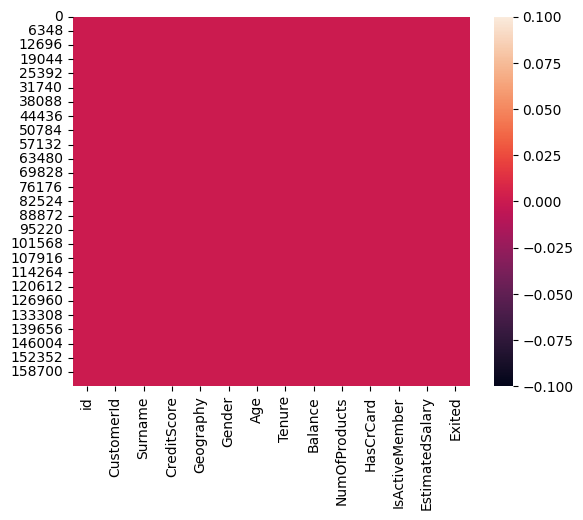

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
cat_cols = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Geography', 'Gender']
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [16]:
for col in cat_cols:
    print(f'{col} unique values are: {df[col].nunique()} => {(df[col].unique())}')


Tenure unique values are: 11 => [ 3  1 10  2  5  4  8  6  9  7  0]
NumOfProducts unique values are: 4 => [2 1 3 4]
HasCrCard unique values are: 2 => [1. 0.]
IsActiveMember unique values are: 2 => [0. 1.]
Exited unique values are: 2 => [0 1]
Geography unique values are: 3 => ['France' 'Spain' 'Germany']
Gender unique values are: 2 => ['Male' 'Female']


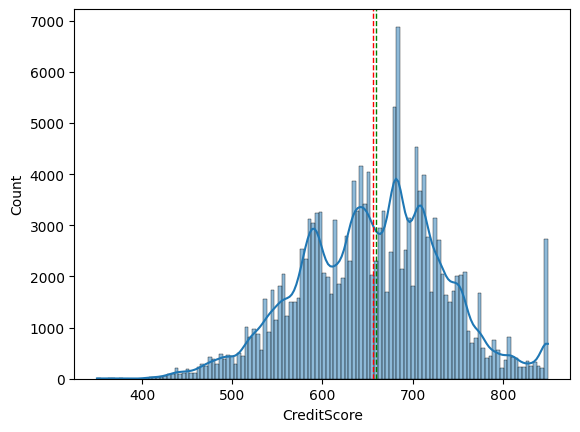

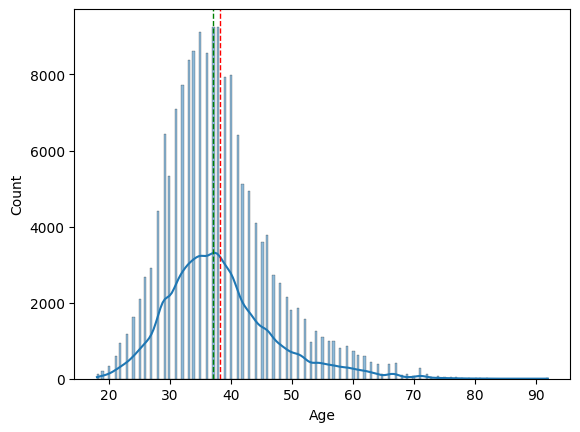

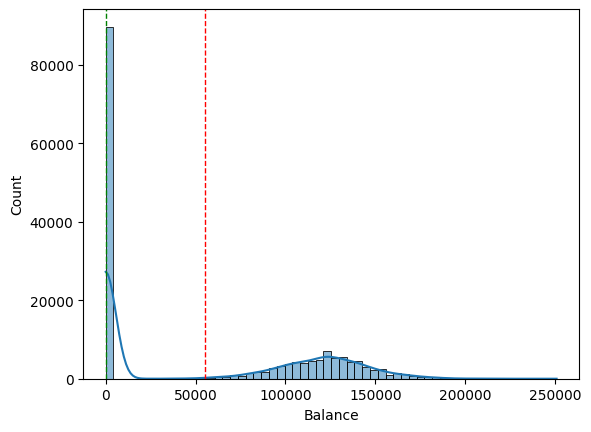

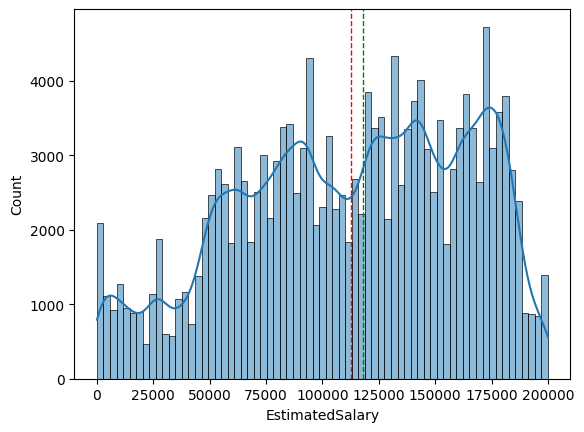

In [17]:
for col in num_cols:
    sns.histplot(df, x=col, kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1)
    plt.show()

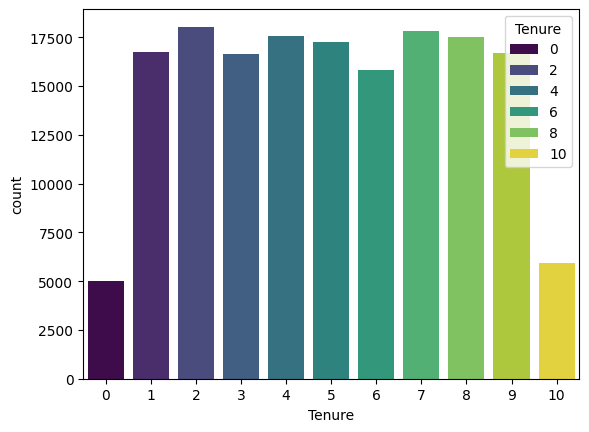

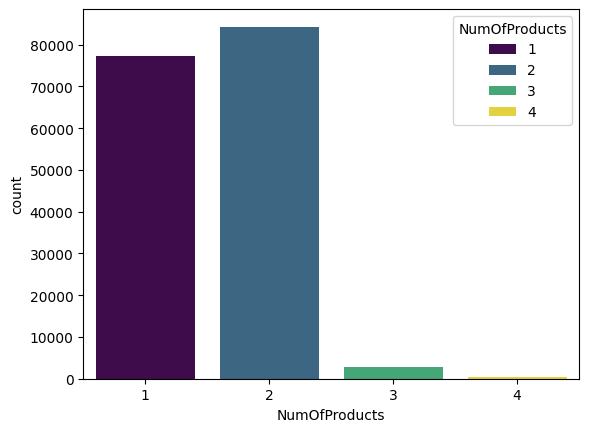

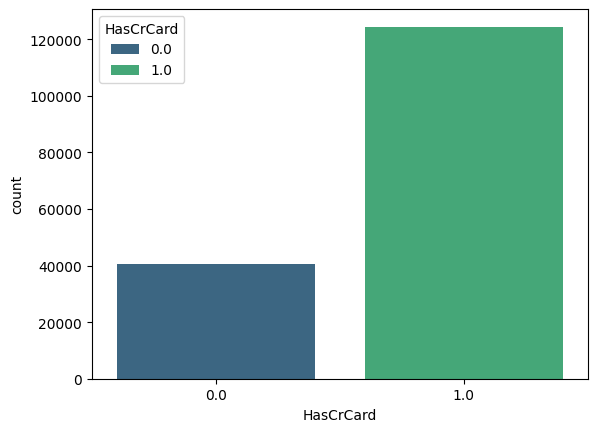

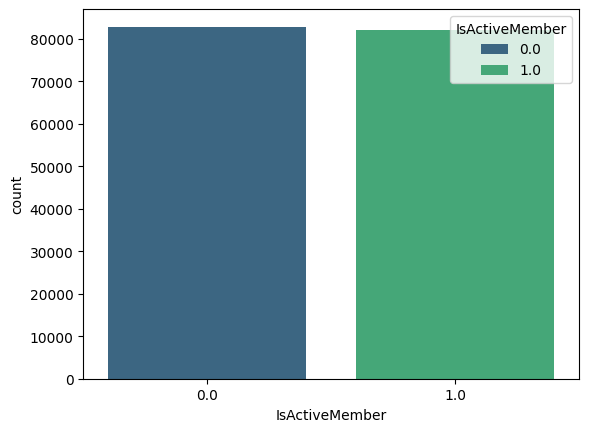

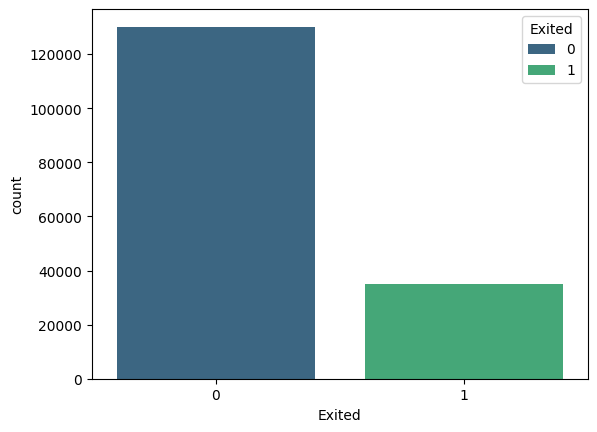

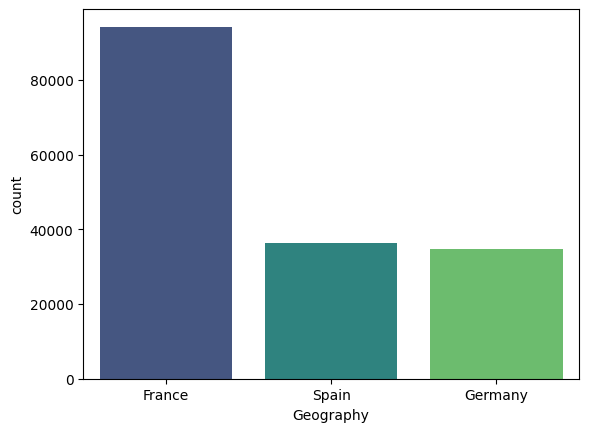

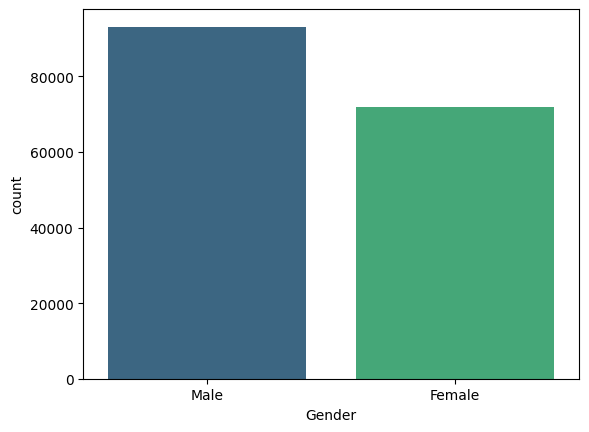

In [18]:
# plot count plot for each cat_col with different colors    
for cat_col in cat_cols:
    sns.countplot(data=df, x=cat_col, hue=cat_col, palette='viridis')
    plt.show()


In [19]:
X = df.drop(['Exited', 'Surname', 'CustomerId', 'id'], axis = 1)
y = df['Exited']

In [20]:
# encoding all the catergorical columns with object and category datatypes
encoder = LabelEncoder()
encoders = {}

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        X[col] = encoder.fit_transform(X[col])
        encoders[col] = encoder

In [21]:
encoders

{'Geography': LabelEncoder(), 'Gender': LabelEncoder()}

In [22]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [23]:
# train test split into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(132027, 10)

Epoch 1/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 730us/step - accuracy: 0.7303 - loss: 929.0245 - val_accuracy: 0.7893 - val_loss: 1.0848
Epoch 2/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 3s 697us/step - accuracy: 0.7706 - loss: 0.7104 - val_accuracy: 0.7893 - val_loss: 0.5603
Epoch 3/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 3s 707us/step - accuracy: 0.7866 - loss: 0.5208 - val_accuracy: 0.7893 - val_loss: 0.5151
Epoch 4/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 3s 765us/step - accuracy: 0.7877 - loss: 0.5170 - val_accuracy: 0.7893 - val_loss: 0.5149
Epoch 5/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 3s 745us/step - accuracy: 0.7875 - loss: 0.5173 - val_accuracy: 0.7893 - val_loss: 0.5149
Epoch 6/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 3s 702us/step - accuracy: 0.7873 - loss: 0.5193 - val_accuracy: 0.7893 - val_loss: 0.5150
Epoch 7/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 3s 698us/step - accuracy: 0.7882 - loss: 0.5163 - val_accuracy: 0.7893 - val_loss: 0.5149
Epoch 8/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 3s 715us/step - accuracy

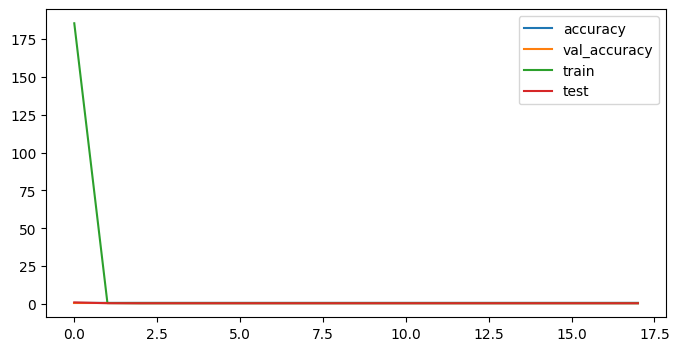

Accuracy: 78.93%
Loss: 0.51


In [34]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(5, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose = 1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# plotting the loss and accuracy in a single plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# print loss and accurcay
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {round(accuracy*100, 2)}%')
print(f'Loss: {round(loss, 2)}')



In [31]:
# XGB classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# print the metrics
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')


Accuracy: 86.63%
Confusion Matrix: 
[[24661  1391]
 [ 3021  3934]]


In [32]:
# using random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# print the metrics

print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

Accuracy: 85.82%
Confusion Matrix: 
[[24577  1475]
 [ 3205  3750]]


In [52]:
# predict the test data with xgboost and create a submission file of probability of each class
df_X_test = df_test.drop(['Surname', 'CustomerId', 'id'], axis = 1)

for col in df_X_test.columns:
    if col in encoders:
        df_X_test[col] = encoders[col].fit_transform(df_X_test[col])

df_X_test.head()

y_pred = xgb.predict(df_X_test)
y_pred_2 = xgb.predict(df_X_test)

y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [53]:
y_pred_2

array([0, 1, 0, ..., 0, 0, 0])

In [55]:
y_pred = pd.DataFrame(y_pred, columns=['Exited'])
y_pred_2 = pd.DataFrame(y_pred_2, columns=['Exited'])

In [43]:
y_pred

,Exited
0,0
1,1
2,0
3,0
4,0
...,...
110018,0
110019,0
110020,0
110021,0


In [56]:
submission = pd.concat([df_test['id'], y_pred], axis = 1)
submission_2 = pd.concat([df_test['id'], y_pred_2], axis = 1)

In [45]:
y_pred.shape

(110023, 1)

In [46]:
df_test.shape

(110023, 13)

In [47]:
submission

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
...,...,...
110018,275052,0
110019,275053,0
110020,275054,0
110021,275055,0


In [48]:
# export the file in csv format
submission.to_csv('Bank Churn 110k - submission final.csv', index = False)

In [51]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [57]:
# submission['Exited'] = y_pred_2[:, 1]
submission_2.to_csv('Bank Churn 110k - submission final 2.csv', index=False)